In [1]:
import pandas as pd

# Paths to the datasets
training_data_34_66_path = '/data/notebook_files/training_data_34_66.csv'
training_data_10_90_path = '/data/notebook_files/training_data_10_90.csv'
X_test_path = '/data/notebook_files/X_test.csv'
y_test_path = '/data/notebook_files/y_test.csv'

# Loading the datasets
training_data_34_66 = pd.read_csv(training_data_34_66_path)
training_data_10_90 = pd.read_csv(training_data_10_90_path)
X_test = pd.read_csv(X_test_path)
y_test = pd.read_csv(y_test_path)

# SGDClassifier Computation on the 34:66 Class Distribution

In [2]:
X_train_34_66 = training_data_34_66.drop('Class', axis=1)
y_train_34_66 = training_data_34_66['Class']

y_test = y_test.squeeze() 

Accuracy (34:66): 0.993715108317826
Recall/Sensitivity (34:66): 0.8673469387755102
Specificity (34:66): 0.9939328925154756
Precision (34:66): 0.19767441860465115
F2 Score (34:66): 0.5170316301703163
Matthews Correlation Coefficient (MCC) (34:66): 0.41237717141032315
Balanced Classification Rate (BCR) (34:66): 0.9306399156454929
ROC AUC (34:66): 0.9707449137505311
Confusion Matrix (34:66):
[[56519   345]
 [   13    85]]
TN (34:66): 56519, FP (34:66): 345, FN (34:66): 13, TP (34:66): 85


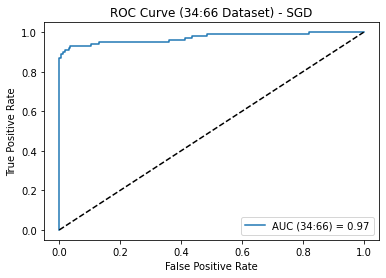

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import (accuracy_score, recall_score, precision_score, fbeta_score,
                             roc_curve, roc_auc_score, confusion_matrix, matthews_corrcoef)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Initialize the SGD Classifier with hinge loss, which gives a linear SVM
sgd_model_34_66 = make_pipeline(StandardScaler(), SGDClassifier(loss='hinge'))

# Train the model on the 34:66 resampled training data
sgd_model_34_66.fit(X_train_34_66, y_train_34_66)

# Predict on the test set
y_pred_34_66_sgd = sgd_model_34_66.predict(X_test)

# Since SGDClassifier does not provide predict_proba by default for hinge loss, we'll use decision function for ROC
y_decision_34_66_sgd = sgd_model_34_66.decision_function(X_test)

# Calculate evaluation metrics
accuracy_34_66_sgd = accuracy_score(y_test, y_pred_34_66_sgd)
recall_34_66_sgd = recall_score(y_test, y_pred_34_66_sgd)
precision_34_66_sgd = precision_score(y_test, y_pred_34_66_sgd)
f2_score_34_66_sgd = fbeta_score(y_test, y_pred_34_66_sgd, beta=2)
roc_auc_34_66_sgd = roc_auc_score(y_test, y_decision_34_66_sgd)
conf_matrix_34_66_sgd = confusion_matrix(y_test, y_pred_34_66_sgd)
mcc_34_66_sgd = matthews_corrcoef(y_test, y_pred_34_66_sgd)

# Extracting TN, FP, FN, TP from confusion matrix
tn_34_66_sgd, fp_34_66_sgd, fn_34_66_sgd, tp_34_66_sgd = conf_matrix_34_66_sgd.ravel()

# Specificity or True Negative Rate
specificity_34_66_sgd = tn_34_66_sgd / (tn_34_66_sgd + fp_34_66_sgd)

# Balanced Classification Rate (BCR) 
bcr_34_66_sgd = (recall_34_66_sgd + specificity_34_66_sgd) / 2

# Print the metrics
print(f'Accuracy (34:66): {accuracy_34_66_sgd}')
print(f'Recall/Sensitivity (34:66): {recall_34_66_sgd}')
print(f'Specificity (34:66): {specificity_34_66_sgd}')
print(f'Precision (34:66): {precision_34_66_sgd}')
print(f'F2 Score (34:66): {f2_score_34_66_sgd}')
print(f'Matthews Correlation Coefficient (MCC) (34:66): {mcc_34_66_sgd}')
print(f'Balanced Classification Rate (BCR) (34:66): {bcr_34_66_sgd}')
print(f'ROC AUC (34:66): {roc_auc_34_66_sgd}')
print(f'Confusion Matrix (34:66):\n{conf_matrix_34_66_sgd}')
print(f'TN (34:66): {tn_34_66_sgd}, FP (34:66): {fp_34_66_sgd}, FN (34:66): {fn_34_66_sgd}, TP (34:66): {tp_34_66_sgd}')

# ROC Curve - using decision scores
fpr_34_66_sgd, tpr_34_66_sgd, _ = roc_curve(y_test, y_decision_34_66_sgd)
plt.plot(fpr_34_66_sgd, tpr_34_66_sgd, label=f'AUC (34:66) = {roc_auc_34_66_sgd:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (34:66 Dataset) - SGD')
plt.legend(loc='lower right')
plt.show()

In [7]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, fbeta_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize the SGD Classifier
sgd_model_34_66 = make_pipeline(StandardScaler(), SGDClassifier(loss='hinge'))

# Define the cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5)

# Define scoring functions for cross-validation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f2_score': make_scorer(fbeta_score, beta=2),
    'mcc': make_scorer(matthews_corrcoef)
}

# Perform cross-validation
cv_results_34_66_sgd = cross_validate(sgd_model_34_66, X_train_34_66, y_train_34_66, cv=cv_strategy, scoring=scoring, n_jobs=-1)

# Extracting scores
accuracy_scores_34_66_sgd = cv_results_34_66_sgd['test_accuracy']
recall_scores_34_66_sgd = cv_results_34_66_sgd['test_recall']
precision_scores_34_66_sgd = cv_results_34_66_sgd['test_precision']
f2_scores_34_66_sgd = cv_results_34_66_sgd['test_f2_score']
mcc_scores_34_66_sgd = cv_results_34_66_sgd['test_mcc']

# Print the mean and standard deviation of the scores for each metric
print(f'Cross-validated accuracy (34:66 - SGD): {np.mean(accuracy_scores_34_66_sgd)} (+/- {np.std(accuracy_scores_34_66_sgd)})')
print(f'Cross-validated recall (34:66 - SGD): {np.mean(recall_scores_34_66_sgd)} (+/- {np.std(recall_scores_34_66_sgd)})')
print(f'Cross-validated precision (34:66 - SGD): {np.mean(precision_scores_34_66_sgd)} (+/- {np.std(precision_scores_34_66_sgd)})')
print(f'Cross-validated F2 score (34:66 - SGD): {np.mean(f2_scores_34_66_sgd)} (+/- {np.std(f2_scores_34_66_sgd)})')
print(f'Cross-validated MCC (34:66 - SGD): {np.mean(mcc_scores_34_66_sgd)} (+/- {np.std(mcc_scores_34_66_sgd)})')

Cross-validated accuracy (34:66 - SGD): 0.9638462903697421 (+/- 0.00010643921777927567)
Cross-validated recall (34:66 - SGD): 0.8761977158546426 (+/- 0.0018402634391098227)
Cross-validated precision (34:66 - SGD): 0.9791271400251969 (+/- 0.0018721856672216717)
Cross-validated F2 score (34:66 - SGD): 0.8950130453277735 (+/- 0.0012333611327581373)
Cross-validated MCC (34:66 - SGD): 0.9035134479562166 (+/- 0.00028611013010741997)


# SGDClassifier Computation on the 10:90 Class Distribution

In [5]:
X_train_10_90 = training_data_10_90.drop('Class', axis=1)
y_train_10_90 = training_data_10_90['Class']

y_test = y_test.squeeze() 

Accuracy (10:90): 0.9991924440855307
Recall/Sensitivity (10:90): 0.8061224489795918
Specificity (10:90): 0.9995251828925155
Precision (10:90): 0.7452830188679245
F2 Score (10:90): 0.7931726907630522
Matthews Correlation Coefficient (MCC) (10:90): 0.7747039885378211
Balanced Classification Rate (BCR) (10:90): 0.9028238159360537
ROC AUC (10:90): 0.9766659512707729
Confusion Matrix (10:90):
[[56837    27]
 [   19    79]]
TN (10:90): 56837, FP (10:90): 27, FN (10:90): 19, TP (10:90): 79


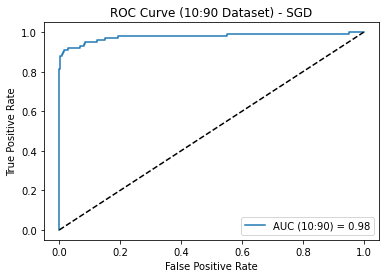

In [6]:
# Initialize the SGD Classifier with hinge loss for the 10:90 class distribution
sgd_model_10_90 = make_pipeline(StandardScaler(), SGDClassifier(loss='hinge'))

# Train the model on the 10:90 resampled training data
sgd_model_10_90.fit(X_train_10_90, y_train_10_90)

# Predict on the test set
y_pred_10_90_sgd = sgd_model_10_90.predict(X_test)

# Since SGDClassifier does not provide predict_proba for hinge loss, use decision function for ROC
y_decision_10_90_sgd = sgd_model_10_90.decision_function(X_test)

# Calculate evaluation metrics
accuracy_10_90_sgd = accuracy_score(y_test, y_pred_10_90_sgd)
recall_10_90_sgd = recall_score(y_test, y_pred_10_90_sgd)
precision_10_90_sgd = precision_score(y_test, y_pred_10_90_sgd)
f2_score_10_90_sgd = fbeta_score(y_test, y_pred_10_90_sgd, beta=2)
roc_auc_10_90_sgd = roc_auc_score(y_test, y_decision_10_90_sgd)
conf_matrix_10_90_sgd = confusion_matrix(y_test, y_pred_10_90_sgd)
mcc_10_90_sgd = matthews_corrcoef(y_test, y_pred_10_90_sgd)

# Extracting TN, FP, FN, TP from confusion matrix
tn_10_90_sgd, fp_10_90_sgd, fn_10_90_sgd, tp_10_90_sgd = conf_matrix_10_90_sgd.ravel()

# Specificity or True Negative Rate
specificity_10_90_sgd = tn_10_90_sgd / (tn_10_90_sgd + fp_10_90_sgd)

# Balanced Classification Rate (BCR) 
bcr_10_90_sgd = (recall_10_90_sgd + specificity_10_90_sgd) / 2

# Print the metrics
print(f'Accuracy (10:90): {accuracy_10_90_sgd}')
print(f'Recall/Sensitivity (10:90): {recall_10_90_sgd}')
print(f'Specificity (10:90): {specificity_10_90_sgd}')
print(f'Precision (10:90): {precision_10_90_sgd}')
print(f'F2 Score (10:90): {f2_score_10_90_sgd}')
print(f'Matthews Correlation Coefficient (MCC) (10:90): {mcc_10_90_sgd}')
print(f'Balanced Classification Rate (BCR) (10:90): {bcr_10_90_sgd}')
print(f'ROC AUC (10:90): {roc_auc_10_90_sgd}')
print(f'Confusion Matrix (10:90):\n{conf_matrix_10_90_sgd}')
print(f'TN (10:90): {tn_10_90_sgd}, FP (10:90): {fp_10_90_sgd}, FN (10:90): {fn_10_90_sgd}, TP (10:90): {tp_10_90_sgd}')

# ROC Curve - using decision scores
fpr_10_90_sgd, tpr_10_90_sgd, _ = roc_curve(y_test, y_decision_10_90_sgd)
plt.plot(fpr_10_90_sgd, tpr_10_90_sgd, label=f'AUC (10:90) = {roc_auc_10_90_sgd:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (10:90 Dataset) - SGD')
plt.legend(loc='lower right')
plt.show()

In [8]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, fbeta_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize the SGD Classifier
sgd_model_10_90 = make_pipeline(StandardScaler(), SGDClassifier(loss='hinge'))

# Define the cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5)

# Define scoring functions for cross-validation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f2_score': make_scorer(fbeta_score, beta=2),
    'mcc': make_scorer(matthews_corrcoef)
}

# Perform cross-validation
cv_results_10_90_sgd = cross_validate(sgd_model_10_90, X_train_10_90, y_train_10_90, cv=cv_strategy, scoring=scoring, n_jobs=-1)

# Extracting scores
accuracy_scores_10_90_sgd = cv_results_10_90_sgd['test_accuracy']
recall_scores_10_90_sgd = cv_results_10_90_sgd['test_recall']
precision_scores_10_90_sgd = cv_results_10_90_sgd['test_precision']
f2_scores_10_90_sgd = cv_results_10_90_sgd['test_f2_score']
mcc_scores_10_90_sgd = cv_results_10_90_sgd['test_mcc']

# Print the mean and standard deviation of the scores for each metric
print(f'Cross-validated accuracy (10:90 - SGD): {np.mean(accuracy_scores_10_90_sgd)} (+/- {np.std(accuracy_scores_10_90_sgd)})')
print(f'Cross-validated recall (10:90 - SGD): {np.mean(recall_scores_10_90_sgd)} (+/- {np.std(recall_scores_10_90_sgd)})')
print(f'Cross-validated precision (10:90 - SGD): {np.mean(precision_scores_10_90_sgd)} (+/- {np.std(precision_scores_10_90_sgd)})')
print(f'Cross-validated F2 score (10:90 - SGD): {np.mean(f2_scores_10_90_sgd)} (+/- {np.std(f2_scores_10_90_sgd)})')
print(f'Cross-validated MCC (10:90 - SGD): {np.mean(mcc_scores_10_90_sgd)} (+/- {np.std(mcc_scores_10_90_sgd)})')

Cross-validated accuracy (10:90 - SGD): 0.9836047882651531 (+/- 0.0006722133639131615)
Cross-validated recall (10:90 - SGD): 0.8256320070345131 (+/- 0.008048726896805455)
Cross-validated precision (10:90 - SGD): 0.9928202238329348 (+/- 0.0015429614632922807)
Cross-validated F2 score (10:90 - SGD): 0.8543941938067583 (+/- 0.00678400706893299)
Cross-validated MCC (10:90 - SGD): 0.8971867569584482 (+/- 0.0043774259410552414)
